In [2]:
from tensorflow.keras.layers import Dense ,Conv2D, MaxPooling2D,Input,multiply
from tensorflow.keras.preprocessing import image
from tensorflow.keras import activations, initializers, regularizers
import numpy as np
import pandas as pd
import os
import json
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import statistics
from tensorflow.keras import backend as k
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.models import Model,model_from_json
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from scipy.stats import weibull_min
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from lifelines.utils import concordance_index
from scipy.stats import weibull_min,weibull_max
import pickle
import random
from scipy import stats
#import pickle5 as pickle
from tensorflow.keras.layers import Layer
from tensorflow.keras.regularizers import l2

In [3]:
def file_name(file_dir):  
    for root, dirs, files in os.walk(file_dir): 
        #print(root) #當前目錄路徑 
        #print(dirs) #當前路徑下所有子目錄 
        #print(files) #當前路徑下所有非目錄子檔案 
        return files

In [4]:
#  Dead 1    Alive 0

# Feature Extract

In [4]:
import numpy as np


class DataGenerator(tf.keras.utils.Sequence):
    'Generates data for Keras'
    #protein_df = pd.read_pickle('protein_interaction.pkl')
    #rna_df = pd.read_pickle('transcriptomics_log.pkl')
    def __init__(self, fig_IDs, batch_size=32, dim=(299,299), n_channels=3,
                 folder='train',shuffle=False):
        
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.fig_IDs = fig_IDs

        self.n_channels = n_channels
        self.shuffle = shuffle
        self.folder = folder
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.fig_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        #print(len(indexes))
        # Find list of IDs
        fig_IDs_temp = [self.fig_IDs[k] for k in indexes]
       
        # Generate data
        X_img = self.__data_generation(indexes)
        #xx = [X_img,X_protein]
        #print(len(xx),xx[0].shape,xx[1].shape)
        #print(y.shape)
        return X_img

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.fig_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, fig_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization

        person_id=[]
        
        X_img = []
      

        # Generate data
        for i, ID in enumerate(fig_IDs_temp):
            # Store sample
           
            train_image=[]
            img = image.load_img('TMA_color/' + self.fig_IDs[ID] ,target_size=(224,224,3))
            img = image.img_to_array(img)
            img = img/255
            train_image.append(img)
            X_img.append(train_image)
            
        
            
        

            
            
        X_img = np.array(X_img).squeeze()[np.newaxis,:]
        
              
        
        
        return X_img

In [5]:
with open('TMA_all_df.pkl', "rb") as fh:
    all_df = pickle.load(fh)

In [6]:
all_df

,TumorID,bar_code,fig,stageall,crccens,crcsurv,oscens,osurv
0,82,"TMA 1 Level 16_Core[1,1,10]_[4381,47584]","TMA 1 Level 16_Core[1,1,10]_[4381,47584]@24.jpg",2,1,2.166667,1,2.166667
1,82,"TMA 1 Level 16_Core[1,1,10]_[4381,47584]","TMA 1 Level 16_Core[1,1,10]_[4381,47584]@30.jpg",2,1,2.166667,1,2.166667
2,82,"TMA 1 Level 16_Core[1,1,10]_[4381,47584]","TMA 1 Level 16_Core[1,1,10]_[4381,47584]@32.jpg",2,1,2.166667,1,2.166667
3,82,"TMA 1 Level 16_Core[1,1,10]_[4381,47584]","TMA 1 Level 16_Core[1,1,10]_[4381,47584]@14.jpg",2,1,2.166667,1,2.166667
4,82,"TMA 1 Level 16_Core[1,1,10]_[4381,47584]","TMA 1 Level 16_Core[1,1,10]_[4381,47584]@21.jpg",2,1,2.166667,1,2.166667
...,...,...,...,...,...,...,...,...
43865,1748,"TMA 6 Level 1_Core[1,9,1]_[18748,43999]","TMA 6 Level 1_Core[1,9,1]_[18748,43999]@33.jpg",2,0,7.666667,1,7.666667
43866,1748,"TMA 6 Level 1_Core[1,9,1]_[18748,43999]","TMA 6 Level 1_Core[1,9,1]_[18748,43999]@34.jpg",2,0,7.666667,1,7.666667
43867,1748,"TMA 6 Level 1_Core[1,9,1]_[18748,43999]","TMA 6 Level 1_Core[1,9,1]_[18748,43999]@22.jpg",2,0,7.666667,1,7.666667
43868,1748,"TMA 6 Level 1_Core[1,9,1]_[18748,43999]","TMA 6 Level 1_Core[1,9,1]_[18748,43999]@31.jpg",2,0,7.666667,1,7.666667


### Data

In [7]:
real_day=list(all_df['crcsurv'])
day_mean=statistics.mean(real_day)
day_std=statistics.stdev(real_day)
Days_std=[((i -day_mean)/day_std)+1.6 for i in real_day]

#fold1 +1.6
all_df['crcsurv_std'] = Days_std
all_df=all_df.reset_index(drop=True)

In [8]:
min(all_df['crcsurv_std'])

0.2276157897249682

### Model

In [9]:
# Parameters
params_all = {'dim': (299,299),'batch_size': 1,'n_channels': 3,'shuffle': False,'folder':'test'}

In [10]:
all_partition = all_df['fig'] #train_whole_protein_rna_fig
all_labels = all_df['crcsurv_std']
all_status = all_df['crccens']
all_bar= all_df['bar_code']#train_whole_protein_rna_bar

In [11]:
# Generators
all_generator = DataGenerator(all_partition, **params_all ) #**表示可棟

In [12]:
def weibull_loglik_discrete(y_true, ab_pred, name=None):
    y_ = y_true[:, 0]
    u_ = y_true[:, 1]
    a_ = ab_pred[:, 0]
    b_ = ab_pred[:, 1]
    #print(y_, u_, a_, b_)
    hazard0 = k.pow((y_ + 1e-35) / a_, b_)
    hazard1 = k.pow((y_ + 1) / a_, b_)
    return -1 * k.mean(u_ * k.log(k.exp(hazard1 - hazard0) - 1.0) - hazard1)


def weibull_loglik_continuous(y_true, ab_pred, name=None):
    y_ = y_true[:, 0]
    u_ = y_true[:, 1]
    a_ = ab_pred[:, 0]
    b_ = ab_pred[:, 1]  # death / live
    ya = (y_ + 1e-35) / a_
    return -1 * k.mean(u_ * (k.log(b_) + b_ * k.log(ya)) - k.pow(ya, b_))


def activate(ab):
    a = k.exp(ab[:, 0])
    b = k.softplus(ab[:, 1])
    a = k.reshape(a, (k.shape(a)[0], 1))
    b = k.reshape(b, (k.shape(b)[0], 1))
    return k.concatenate((a, b), axis=1)

In [13]:
from tensorflow.keras.applications import ResNet50

In [14]:
base_model = Xception(weights=None,include_top=False)#weights='imagenet', include_top=False
x_out = base_model.output
gap = GlobalAveragePooling2D()(x_out)
x = Dense(1024, activation='relu')(gap)
x = Dense(2, activate)(x)
model = Model(inputs=base_model.input, outputs=x)

# for layer in base_model.layers:
#     layer.trainable = False


In [15]:
# base_model = ResNet50(weights='imagenet',include_top=False)#weights='imagenet', include_top=False
# x_out = base_model.output
# gap = GlobalAveragePooling2D()(x_out)
# # x = Dense(1024, activation='relu')(gap)
# # x = Dense(2, activate)(x)
# # model = Model(inputs=base_model.input, outputs=x)

# # for layer in base_model.layers:
# #     layer.trainable = False


In [16]:
model.load_weights('0318_test1.h5')

In [17]:
model_2048 = Model(inputs=base_model.input, outputs=gap)

In [18]:
model_2048.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [19]:
# feature_test = model_2048.predict(all_generator)

In [20]:
np.save('feature1.npy', feature_test)

In [21]:
model.load_weights('0318_test2.h5')
model_2048 = Model(inputs=base_model.input, outputs=gap)
feature_test = model_2048.predict(all_generator)
np.save('feature2.npy', feature_test)

In [22]:
model.load_weights('0318_test3_0727.h5')
model_2048 = Model(inputs=base_model.input, outputs=gap)
feature_test = model_2048.predict(all_generator)
np.save('feature3.npy', feature_test)

In [23]:
model.load_weights('0318_test4.h5')
model_2048 = Model(inputs=base_model.input, outputs=gap)
feature_test = model_2048.predict(all_generator)
np.save('feature4.npy', feature_test)

In [24]:
model.load_weights('0318_test5.h5')
model_2048 = Model(inputs=base_model.input, outputs=gap)
feature_test = model_2048.predict(all_generator)
np.save('feature5.npy', feature_test)

In [18]:
# np.save('feature_TMA.npy', feature_test)

In [87]:
npy1=np.load('feature3.npy')

In [88]:
pd.DataFrame(npy1)

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.039556,0.209257,0.520941,0.357850,0.223117,0.135001,0.151145,0.089430,0.132260,0.027069,...,0.002615,1.073007,0.125101,0.344183,1.029315,0.010243,0.893380,0.282223,0.636580,0.082908
1,0.039572,0.277641,0.498769,0.255649,0.103115,0.156631,0.262770,0.068778,0.080260,0.053519,...,0.008544,1.080681,0.134662,0.345137,0.886586,0.000000,0.759522,0.371247,0.558611,0.175247
2,0.066398,0.264685,0.328022,0.274649,0.175126,0.114448,0.177223,0.104976,0.141949,0.055554,...,0.013988,0.624264,0.165692,0.297465,0.520542,0.007630,0.784408,0.353560,0.577180,0.055967
3,0.047977,0.157079,0.643000,0.275863,0.278633,0.255578,0.083633,0.073698,0.108580,0.011105,...,0.006061,1.113604,0.153004,0.399286,0.926759,0.021559,0.883409,0.352745,0.541346,0.127673
4,0.135805,0.252883,0.222415,0.132951,0.113099,0.105632,0.230085,0.109195,0.069379,0.069868,...,0.011786,0.689897,0.154012,0.254647,0.515559,0.012166,0.760531,0.386344,0.617011,0.117321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43865,0.156412,0.238043,0.190149,0.134287,0.040522,0.118554,0.257407,0.063481,0.051100,0.078508,...,0.039574,0.466835,0.192382,0.253952,0.250953,0.033612,0.575485,0.198356,0.419002,0.116083
43866,0.097116,0.202467,0.291204,0.256250,0.086699,0.165944,0.342175,0.078148,0.071627,0.081135,...,0.023819,0.526274,0.226036,0.338180,0.350328,0.008404,0.620902,0.206827,0.372557,0.094466
43867,0.185304,0.270304,0.305057,0.200248,0.110371,0.186730,0.179201,0.098397,0.059461,0.116176,...,0.006362,0.419027,0.137379,0.293748,0.336831,0.057623,0.603923,0.231927,0.285012,0.178688
43868,0.092096,0.235378,0.339257,0.330864,0.041587,0.110578,0.188549,0.066400,0.030917,0.098334,...,0.082299,0.350610,0.175147,0.363239,0.342582,0.015111,0.258337,0.164132,0.374257,0.118329


# MIL MODEL

In [133]:
# with open('TMA_all_df.pkl', "rb") as fh:
#     all_df = pickle.load(fh)
    
# npy1=np.load('feature1.npy')
# npy2=np.load('feature2.npy')
# npy3=np.load('feature3.npy')
# npy4=np.load('feature4.npy')
# npy5=np.load('feature5.npy')

# npy_all=(npy1+npy2+npy3+npy4+npy5)/5

# res_all = pd.concat([all_df,pd.DataFrame(npy_all)],axis=1)

# res_all.to_pickle('paper/TMA/TMA_features_dfs.pkl')



# res1 = pd.concat([all_df,pd.DataFrame(npy5)],axis=1)

# res1.to_pickle('paper/TMA/all_df_features5.pkl')

In [207]:
# all_df=pd.read_pickle('paper/TMA/all_df_features5.pkl')

In [2]:
all_df=pd.read_pickle('paper/TMA/TMA_features_dfs.pkl')

NameError: name 'pd' is not defined

In [64]:
# all_df_2=pd.read_pickle('all_df_features_TMA.pkl')

In [65]:
# foreground=[]
# for i in range(0,len(all_df)):
#     img = image.load_img('TMA_color/'+all_df['fig'][i])
#     gray = img.convert('L')
#     gray = image.img_to_array(gray)
#     per_white=np.count_nonzero(gray == [255])
#     proportion=(per_white/(512*512))*100
#     foreground.append(proportion)

In [66]:
# all_df.insert(3, 'background', all_df_2['background'])

In [67]:
# all_df=all_df.rename(columns={'foreground': 'background'})

In [1]:
all_df

NameError: name 'all_df' is not defined

In [69]:
all_df=all_df.loc[all_df['stageall'].isin([1,2])]
all_df=all_df.reset_index(drop=True)

In [70]:
# all_df=all_df.loc[all_df['background'] < 50]
# all_df=all_df.reset_index(drop=True)

In [71]:
all_df

,TumorID,bar_code,fig,background,stageall,crccens,crcsurv,oscens,osurv,0,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,82,"TMA 1 Level 16_Core[1,1,10]_[4381,47584]","TMA 1 Level 16_Core[1,1,10]_[4381,47584]@24.jpg",28.545761,2,1,2.166667,1,2.166667,0.094624,...,0.121917,0.547051,0.248604,0.188397,0.624564,0.242792,0.373171,0.244326,0.592219,0.398844
1,82,"TMA 1 Level 16_Core[1,1,10]_[4381,47584]","TMA 1 Level 16_Core[1,1,10]_[4381,47584]@30.jpg",38.960266,2,1,2.166667,1,2.166667,0.099817,...,0.216653,0.518685,0.249025,0.223007,0.512509,0.185021,0.326533,0.282315,0.487649,0.393312
2,82,"TMA 1 Level 16_Core[1,1,10]_[4381,47584]","TMA 1 Level 16_Core[1,1,10]_[4381,47584]@32.jpg",24.634933,2,1,2.166667,1,2.166667,0.101280,...,0.132109,0.368404,0.146144,0.176058,0.419232,0.177529,0.363399,0.242910,0.453877,0.346850
3,82,"TMA 1 Level 16_Core[1,1,10]_[4381,47584]","TMA 1 Level 16_Core[1,1,10]_[4381,47584]@14.jpg",25.883865,2,1,2.166667,1,2.166667,0.131533,...,0.162214,0.537769,0.267197,0.215230,0.633670,0.142312,0.371115,0.203837,0.488144,0.439603
4,82,"TMA 1 Level 16_Core[1,1,10]_[4381,47584]","TMA 1 Level 16_Core[1,1,10]_[4381,47584]@21.jpg",16.209412,2,1,2.166667,1,2.166667,0.121493,...,0.132354,0.412170,0.210573,0.161562,0.443283,0.170144,0.307422,0.239695,0.456363,0.372628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24499,1748,"TMA 6 Level 1_Core[1,9,1]_[18748,43999]","TMA 6 Level 1_Core[1,9,1]_[18748,43999]@33.jpg",16.228104,2,0,7.666667,1,7.666667,0.109905,...,0.117920,0.274932,0.168194,0.188032,0.304673,0.107213,0.293569,0.171135,0.308353,0.275279
24500,1748,"TMA 6 Level 1_Core[1,9,1]_[18748,43999]","TMA 6 Level 1_Core[1,9,1]_[18748,43999]@34.jpg",40.784836,2,0,7.666667,1,7.666667,0.145562,...,0.158387,0.359180,0.257513,0.222152,0.322064,0.158987,0.303845,0.181087,0.365893,0.343142
24501,1748,"TMA 6 Level 1_Core[1,9,1]_[18748,43999]","TMA 6 Level 1_Core[1,9,1]_[18748,43999]@22.jpg",32.495499,2,0,7.666667,1,7.666667,0.177501,...,0.160086,0.293866,0.226283,0.239825,0.267547,0.184372,0.346426,0.148781,0.361701,0.324070
24502,1748,"TMA 6 Level 1_Core[1,9,1]_[18748,43999]","TMA 6 Level 1_Core[1,9,1]_[18748,43999]@31.jpg",37.171173,2,0,7.666667,1,7.666667,0.129669,...,0.203175,0.229433,0.195291,0.266301,0.260218,0.182485,0.273663,0.176872,0.339139,0.236204


In [72]:
class DataGenerator(tf.keras.utils.Sequence):
    'Generates data for Keras'

    

    
    def __init__(self, patient_bar,feature_IDs, labels,status, batch_size=32, dim=(299,299), n_channels=3,
                 folder='train',shuffle=False):
        
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.status = status
        self.feature_IDs = feature_IDs
        self.patient_bar=patient_bar

        self.n_channels = n_channels
        self.shuffle = shuffle
        self.folder = folder
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.patient_bar) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        
        # Find list of IDs
        patient_bar_temp = [self.patient_bar[k] for k in indexes]

        
       
        # Generate data
        X_person, y  = self.__data_generation(indexes)
        
       
        #xx = [X_img,X_protein]
        #print(len(xx),xx[0].shape,xx[1].shape)
        #print(y.shape)
        return X_person, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.patient_bar))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, patient_bar_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        
        all_df=pd.read_pickle('all_df_features_TMA.pkl')       
        
        real_day=list(all_df['crcsurv'])
        #real_day=[((i*365 -day_mean)/day_std)+1.6 for i in real_day]
        #int_day = map(int, real_day)
        #real_day=list(int_day)
        day_mean=statistics.mean(real_day)
        day_std=statistics.stdev(real_day)
        Days_std=[((i -day_mean)/day_std)+1.6 for i in real_day]

        #fold1 +1.6
        all_df.insert(8, 'crcsurv_std', Days_std)
        all_df=all_df.reset_index(drop=True)

        feature_columns=all_df.columns[-2048:]
        
        X_person = []
        
        y=[]
        y_d = []
        y_s = []

        # Generate data
        for i, ID in enumerate(patient_bar_temp):
            all_array=[]

            per_person=all_df.loc[all_df['TumorID'] == self.patient_bar[ID]] #select a person
                
            per_person_array=(per_person[feature_columns]).to_numpy() #per person features to array
            all_array.append(per_person_array)
            
            X_person.append(all_array)
            
            
            
            
            y_d.append(list(per_person['crcsurv_std'])[0])
            y_s.append(list(per_person['crccens'])[0])

            
            
        X_person = np.array(X_person).squeeze()
        
        if X_person.shape ==(2048,) :
            X_person=X_person[np.newaxis,:]
        
              
        y_d = np.array(y_d).astype('float')[:, np.newaxis]
        
        y_s = np.array(y_s).astype('int')[:, np.newaxis]
        y_temp = np.hstack((y_d, y_s))   
        
        y = tf.convert_to_tensor(y_temp, dtype=tf.float32)
        
        return X_person, y

In [73]:
class Mil_Attention(Layer):
    """
    Mil Attention Mechanism
    This layer contains Mil Attention Mechanism
    # Input Shape
        2D tensor with shape: (batch_size, input_dim)
    # Output Shape
        2D tensor with shape: (1, units)
    """

    def __init__(self, L_dim, output_dim, kernel_initializer='glorot_uniform', kernel_regularizer=None,
                    use_bias=True, use_gated=False, **kwargs):
        self.L_dim = L_dim
        self.output_dim = output_dim
        self.use_bias = use_bias
        self.use_gated = use_gated

        self.v_init = initializers.get(kernel_initializer)
        self.w_init = initializers.get(kernel_initializer)
        self.u_init = initializers.get(kernel_initializer)


        self.v_regularizer = regularizers.get(kernel_regularizer)
        self.w_regularizer = regularizers.get(kernel_regularizer)
        self.u_regularizer = regularizers.get(kernel_regularizer)

        super(Mil_Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 2
        input_dim = input_shape[1]

        self.V = self.add_weight(shape=(input_dim, self.L_dim),
                                      initializer=self.v_init,
                                      name='v',
                                      regularizer=self.v_regularizer,
                                      trainable=True)


        self.w = self.add_weight(shape=(self.L_dim, 1),
                                    initializer=self.w_init,
                                    name='w',
                                    regularizer=self.w_regularizer,
                                    trainable=True)


        if self.use_gated:
            self.U = self.add_weight(shape=(input_dim, self.L_dim),
                                     initializer=self.u_init,
                                     name='U',
                                     regularizer=self.u_regularizer,
                                     trainable=True)
        else:
            self.U = None

        self.input_built = True


    def call(self, x, mask=None):
        n, d = x.shape
        ori_x = x
        # do Vhk^T
        x = k.tanh(k.dot(x, self.V)) # (2,64)

        if self.use_gated: #no gate
            gate_x = k.sigmoid(k.dot(ori_x, self.U))
            ac_x = x * gate_x
        else:
            ac_x = x

        # do w^T x
        soft_x = k.dot(ac_x, self.w)  # (2,64) * (64, 1) = (2,1)
        alpha = k.softmax(k.transpose(soft_x)) # (2,1)  #change
        alpha = k.transpose(alpha)
        return alpha

    def compute_output_shape(self, input_shape):
        shape = list(input_shape)
        assert len(shape) == 2
        shape[1] = self.output_dim
        return tuple(shape)

    def get_config(self):
        config = {
            'output_dim': self.output_dim,
            'v_initializer': initializers.serialize(self.V.initializer),
            'w_initializer': initializers.serialize(self.w.initializer),
            'v_regularizer': regularizers.serialize(self.v_regularizer),
            'w_regularizer': regularizers.serialize(self.w_regularizer),
            'use_bias': self.use_bias
        }
        base_config = super(Mil_Attention, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))


class Last_Sigmoid(Layer):
    """
    Attention Activation
    This layer contains a FC layer which only has one neural with sigmoid actiavtion
    and MIL pooling. The input of this layer is instance features. Then we obtain
    instance scores via this FC layer. And use MIL pooling to aggregate instance scores
    into bag score that is the output of Score pooling layer.
    This layer is used in mi-Net.
    # Arguments
        output_dim: Positive integer, dimensionality of the output space
        kernel_initializer: Initializer of the `kernel` weights matrix
        bias_initializer: Initializer of the `bias` weights
        kernel_regularizer: Regularizer function applied to the `kernel` weights matrix
        bias_regularizer: Regularizer function applied to the `bias` weights
        use_bias: Boolean, whether use bias or not
        pooling_mode: A string,
                      the mode of MIL pooling method, like 'max' (max pooling),
                      'ave' (average pooling), 'lse' (log-sum-exp pooling)
    # Input shape
        2D tensor with shape: (batch_size, input_dim)
    # Output shape
        2D tensor with shape: (1, units)
    """
    def __init__(self, output_dim, kernel_initializer='glorot_uniform', bias_initializer='zeros',
                    kernel_regularizer=None, bias_regularizer=None,
                    use_bias=True, **kwargs):
        self.output_dim = output_dim

        self.kernel_initializer = initializers.get(kernel_initializer)
        self.bias_initializer = initializers.get(bias_initializer)
        self.kernel_regularizer = regularizers.get(kernel_regularizer)
        self.bias_regularizer = regularizers.get(bias_regularizer)

        self.use_bias = use_bias
        super(Last_Sigmoid, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 2
        input_dim = input_shape[1]

        self.kernel = self.add_weight(shape=(input_dim, self.output_dim),
                                        initializer=self.kernel_initializer,
                                        name='kernel',
                                        regularizer=self.kernel_regularizer)

        if self.use_bias:
            self.bias = self.add_weight(shape=(self.output_dim,),
                                        initializer=self.bias_initializer,
                                        name='bias',
                                        regularizer=self.bias_regularizer)
        else:
            self.bias = None

        self.input_built = True
    
    def activate(ab):
        a = k.exp(ab[:, 0])
        b = k.softplus(ab[:, 1])
        a = k.reshape(a, (k.shape(a)[0], 1))
        b = k.reshape(b, (k.shape(b)[0], 1))
        return k.concatenate((a, b), axis=1)

    def call(self, x, mask=None):
        n, d = x.shape
        x = k.sum(x, axis=0, keepdims=True)
        # compute instance-level score
        x = k.dot(x, self.kernel)
        if self.use_bias:
            x = k.bias_add(x, self.bias)

        # sigmoid
        out = activate(x) #change


        return out

    def compute_output_shape(self, input_shape):
        shape = list(input_shape)
        assert len(shape) == 2
        shape[1] = self.output_dim
        return tuple(shape)

    def get_config(self):
        config = {
            'output_dim': self.output_dim,
            'kernel_initializer': initializers.serialize(self.kernel.initializer),
            'bias_initializer': initializers.serialize(self.bias_initializer),
            'kernel_regularizer': regularizers.serialize(self.kernel_regularizer),
            'bias_regularizer': regularizers.serialize(self.bias_regularizer),
            'use_bias': self.use_bias
        }
        base_config = super(Last_Sigmoid, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [119]:
real_day=list(all_df['crcsurv'])
int_day = map(int, real_day)
real_day=list(int_day)
day_mean=statistics.mean(real_day)
day_std=statistics.stdev(real_day)
Days_std=[((i -day_mean)/day_std)+1.6 for i in real_day]

#fold1 +1.6
# all_df.insert(8, 'crcsurv_std', Days_std)
all_df['crcsurv_std']=Days_std

#all_df=all_df.reset_index(drop=True)

In [120]:
day_median=statistics.median(real_day)

In [121]:
all_partition = all_df['fig'] #train_whole_protein_rna_fig
all_labels = all_df['crcsurv_std']
all_status = all_df['crccens']
all_bar= list(set(all_df['TumorID']))

In [122]:
# Parameters
params_all = {'dim': (299,299),'batch_size': 1,'n_channels': 3,'shuffle': False,'folder':'test'}

In [123]:
# Generators
all_generator = DataGenerator(all_bar,all_partition, all_labels,all_status, **params_all)

In [124]:


def weibull_loglik_discrete(y_true, ab_pred, name=None):
    y_ = y_true[:, 0]
    u_ = y_true[:, 1]
    a_ = ab_pred[:, 0]
    b_ = ab_pred[:, 1]
    #print(y_, u_, a_, b_)
    hazard0 = k.pow((y_ + 1e-35) / a_, b_)
    hazard1 = k.pow((y_ + 1) / a_, b_)
    return -1 * k.mean(u_ * k.log(k.exp(hazard1 - hazard0) - 1.0) - hazard1)


def weibull_loglik_continuous(y_true, ab_pred, name=None):
    y_ = y_true[:, 0]
    u_ = y_true[:, 1]
    a_ = ab_pred[:, 0]
    b_ = ab_pred[:, 1]  # death / live
    ya = (y_ + 1e-35) / a_
    return -1 * k.mean(u_ * (k.log(b_) + b_ * k.log(ya)) - k.pow(ya, b_))


def activate(ab):
    a = k.exp(ab[:, 0])
    b = k.softplus(ab[:, 1])
    a = k.reshape(a, (k.shape(a)[0], 1))
    b = k.reshape(b, (k.shape(b)[0], 1))
    return k.concatenate((a, b), axis=1)


In [125]:
data_input = Input(shape=(2048), dtype='float32', name='input')
alpha = Mil_Attention(L_dim=2048, output_dim=2, kernel_regularizer=l2(0.000001), name='alpha', use_gated='False')(data_input)
x_mul = multiply([alpha, data_input])
out = Last_Sigmoid(output_dim=2, name='FC1_sigmoid')(x_mul)
x_out = out
model = Model(inputs=data_input, outputs=x_out)



AttributeError: in user code:

    <ipython-input-15-97f1c83c2bb4>:63 call  *
        x = k.tanh(k.dot(x, self.V)) # (2,64)

    AttributeError: 'int' object has no attribute 'tanh'


### training

In [111]:
model.load_weights('paper/weight/0728_mil_dfs_test2_2_1.h5')

OSError: Unable to open file (unable to open file: name = 'paper/weight/0728_mil_dfs_test2_2_1.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [112]:
probabilities = model.predict(all_generator)

In [126]:
data = {'TumorID':  all_bar}
infer_all_df = pd.DataFrame (data, columns = ['TumorID'])

all_origin=all_df[['TumorID','bar_code','crcsurv','crcsurv_std','crccens','stageall']].drop_duplicates(subset=['TumorID'], keep='last')
infer_all_df = pd.merge(infer_all_df, all_origin, on=['TumorID'])

In [127]:

all_predict = np.resize(probabilities, (len(infer_all_df) , 2))



all_result = np.concatenate((np.array(infer_all_df['crcsurv'])[:, np.newaxis], all_predict), axis=1)

predict_list=[]
kappa_list=[]
lambda_list=[]
for i in range(0,len(all_result)):

    
#cdf 0.5
    per=weibull_min.ppf(0.5, scale=all_result[i][1], c=all_result[i][2])

# pdf peak
#     x = np.arange(0,15,0.0001)
#     per_list=weibull_min.pdf(x, scale=all_result[i][1], c=all_result[i][2])
#     per=x[np.argmax(per_list)]
    
    
    kappa=all_result[i][2]
    lamda=all_result[i][1]
    kappa_list.append(kappa)
    lambda_list.append(lamda)
    predict_list.append(per)

infer_all_df['predict_std_day']=predict_list
infer_all_df['lambda']=lambda_list
infer_all_df['kappa']=kappa_list


#C-index
print(concordance_index(infer_all_df['crcsurv'], infer_all_df['predict_std_day'], infer_all_df['crccens']))

0.47063676002671173


In [128]:
print(concordance_index(infer_all_df['crcsurv_std'], infer_all_df['predict_std_day'], infer_all_df['crccens']))

0.47012045374809963


In [86]:
#infer_all_df.to_pickle("/work/TMA/0728_mil_dfs_test2_4_1.pkl")

In [ ]:
# result_test.to_pickle("/work/sophie52052/stage12_img(color)/0224_test1_10_e4pdf.pkl")

In [ ]:
#result_test.to_pickle("/work/sophie52052/colornormalize/0104_test3_02.pkl")

In [240]:
infer_all_df

,TumorID,bar_code,crcsurv,crcsurv_std,crccens,stageall,predict_std_day,lambda,kappa
0,4,"TMA 1 Level 16_Core[1,2,1]_[5271,40710]",1.000000,0.378652,1,4,0.726634,1.068810,0.949814
1,10,"TMA 1 Level 16_Core[1,6,1]_[9835,40427]",17.166667,2.820408,0,2,0.721547,1.069864,0.930497
2,12,"TMA 3 Level 16_Core[1,2,1]_[17906,38928]",0.333333,0.277961,1,4,0.787970,1.068617,1.203024
3,17,"TMA 2 Level 1_Core[2,6,1]_[20407,43089]",0.416667,0.290548,1,4,0.727017,1.040692,1.021807
4,19,"TMA 10 Level 1_Core[1,2,1]_[19639,35543]",19.750000,3.210585,0,1,0.717189,1.057953,0.942794
...,...,...,...,...,...,...,...,...,...
856,373,"TMA 6 Level 1_Core[1,6,6]_[14223,41514]",16.166667,2.669371,0,2,0.763952,1.054359,1.137591
857,380,"TMA 3 Level 16_Core[1,2,2]_[17065,38706]",0.750000,0.340893,1,4,0.706661,1.072298,0.878910
858,384,"TMA 2 Level 1_Core[2,8,14]_[8830,44727]",0.333333,0.277961,1,4,0.730874,1.037724,1.045556
859,322,"TMA 2 Level 1_Core[2,6,8]_[14309,42626]",20.583333,3.336449,0,3,0.742856,1.073200,0.996235


In [331]:
from collections import Counter

In [332]:
c=Counter(all_df['TumorID'])

In [333]:
over_list=[]
for k,v in c.items():
    if v >=30 :
        over_list.append(k)

In [334]:
a=infer_all_df

In [335]:
a=pd.read_pickle('paper/TMA/0728_mil_dfs_test2_2_1.pkl')

In [336]:
# a=pd.read_pickle('/work/TMA/0824_test5_1_1.pkl')

In [357]:
b=a.loc[a['TumorID'].isin(over_list)]

In [358]:
b

,TumorID,bar_code,crcsurv,crcsurv_std,crccens,stageall,predict_std_day,lambda,kappa
0,10,"TMA 1 Level 16_Core[1,6,1]_[9835,40427]",17.166667,2.861590,0,2,1.064071,3.272651,0.326225
1,19,"TMA 10 Level 1_Core[1,2,1]_[19639,35543]",19.750000,3.163818,0,1,1.082845,3.772677,0.293635
2,21,"TMA 2 Level 1_Core[2,9,1]_[20255,46284]",17.083333,2.861590,0,2,1.077026,3.415430,0.317575
3,23,"TMA 1 Level 16_Core[1,14,2]_[18204,41106]",5.250000,1.048227,1,2,1.054533,3.342195,0.317732
4,24,"TMA 2 Level 16_Core[1,14,1]_[19255,49724]",7.750000,1.350454,0,1,1.069597,3.569624,0.304115
...,...,...,...,...,...,...,...,...,...
472,1854,"TMA 6 Level 1_Core[1,20,12]_[8757,53135]",14.583333,2.408250,0,1,1.043601,3.025044,0.344387
473,1184,"TMA 4 Level 16_Core[1,13,5]_[15770,51134]",11.333333,1.954909,0,2,1.072198,4.436997,0.258059
474,1871,"TMA 6 Level 1_Core[1,20,13]_[7744,52937]",4.166667,0.897113,0,2,1.035250,5.244262,0.225895
475,1874,"TMA 10 Level 1_Core[1,4,9]_[12666,36903]",10.250000,1.803795,0,2,1.058511,3.787900,0.287473


In [339]:
a=a.loc[a['stageall'].isin([1,2])]
a=a.reset_index(drop=True)

In [359]:
print(concordance_index(a['crcsurv'], a['predict_std_day'], a['crccens']))

0.5321129748202852


In [360]:
print(concordance_index(b['crcsurv'], b['predict_std_day'], b['crccens']))

0.5310272673772314


In [342]:
a

,TumorID,bar_code,crcsurv,crcsurv_std,crccens,stageall,predict_std_day,lambda,kappa
0,10,"TMA 1 Level 16_Core[1,6,1]_[9835,40427]",17.166667,2.861590,0,2,1.064071,3.272651,0.326225
1,19,"TMA 10 Level 1_Core[1,2,1]_[19639,35543]",19.750000,3.163818,0,1,1.082845,3.772677,0.293635
2,21,"TMA 2 Level 1_Core[2,9,1]_[20255,46284]",17.083333,2.861590,0,2,1.077026,3.415430,0.317575
3,23,"TMA 1 Level 16_Core[1,14,2]_[18204,41106]",5.250000,1.048227,1,2,1.054533,3.342195,0.317732
4,24,"TMA 2 Level 16_Core[1,14,1]_[19255,49724]",7.750000,1.350454,0,1,1.069597,3.569624,0.304115
...,...,...,...,...,...,...,...,...,...
474,1871,"TMA 6 Level 1_Core[1,20,13]_[7744,52937]",4.166667,0.897113,0,2,1.035250,5.244262,0.225895
475,1874,"TMA 10 Level 1_Core[1,4,9]_[12666,36903]",10.250000,1.803795,0,2,1.058511,3.787900,0.287473
476,1876,"TMA 10 Level 1_Core[1,4,10]_[11825,36903]",13.750000,2.257136,0,1,1.059684,3.174984,0.334004
477,1877,"TMA 10 Level 1_Core[1,2,11]_[10985,35320]",15.666667,2.559363,0,2,1.036885,3.860419,0.278811


In [5]:
#TMA DFS




stage12_fold1=pd.read_pickle('work/TMA/0728_mil_dfs_test1_1_1.pkl') 
stage12_fold2=pd.read_pickle('work/TMA/0728_mil_dfs_test2_2_1.pkl') 
stage12_fold3=pd.read_pickle('work/TMA/0728_mil_dfs_test3_3_1.pkl') 
stage12_fold4=pd.read_pickle('work/TMA/0728_mil_dfs_test4_3_1.pkl') 
stage12_fold5=pd.read_pickle('work/TMA/0728_mil_dfs_test5_1_1.pkl')
stage12_fold6=pd.read_pickle('work/TMA/0728_mil_dfs_test1_1_1.pkl')




# med_1=0.540963500605934
# med_2=0.620732191311088
# med_3=0.478602320416088
# med_4=0.562202523794629
# med_5=0.573880919527029


# med_1=0.49924756186555
# med_2=0.614264130972735
# med_3=0.467009129756411
# med_4=0.849625234524646
# med_5=0.592274515201992


stage12_fold1['crcsurv'] = [int(i) for i in stage12_fold1['crcsurv']]
med_1=np.median(list(stage12_fold1['predict_std_day']))

stage12_fold2['crcsurv'] = [int(i) for i in stage12_fold2['crcsurv']]
med_2=np.median(list(stage12_fold2['predict_std_day']))

stage12_fold3['crcsurv'] = [int(i) for i in stage12_fold3['crcsurv']]
med_3=np.median(list(stage12_fold3['predict_std_day']))

stage12_fold4['crcsurv'] = [int(i) for i in stage12_fold4['crcsurv']]
med_4=np.median(list(stage12_fold4['predict_std_day']))

stage12_fold5['crcsurv'] = [int(i) for i in stage12_fold5['crcsurv']]
med_5=np.median(list(stage12_fold5['predict_std_day']))



fold1=list(stage12_fold1['predict_std_day'])
fold2=list(stage12_fold2['predict_std_day'])
fold3=list(stage12_fold3['predict_std_day'])
fold4=list(stage12_fold4['predict_std_day'])
fold5=list(stage12_fold5['predict_std_day'])

Days_std=[]

for i in range(0,len(stage12_fold1)):
    per=(fold1[i]+fold2[i]+fold3[i]+fold4[i]+fold5[i])/5
    Days_std.append(per)



all_df=stage12_fold6
all_df['predict_std_day']=Days_std
all_df=all_df.reset_index(drop=True)

med_mean=(med_1+med_2+med_3+med_4+med_5)/5

stage12_fold6['crcsurv'] = [int(i) for i in stage12_fold6['crcsurv']]
med_mean=np.median(list(stage12_fold6['predict_std_day']))

In [42]:
from lifelines.utils import concordance_index
print(concordance_index(stage12_fold1['crcsurv'], stage12_fold1['predict_std_day'], stage12_fold1['crccens']))
print(concordance_index(stage12_fold2['crcsurv'], stage12_fold2['predict_std_day'], stage12_fold2['crccens']))
print(concordance_index(stage12_fold3['crcsurv'], stage12_fold3['predict_std_day'], stage12_fold3['crccens']))
print(concordance_index(stage12_fold4['crcsurv'], stage12_fold4['predict_std_day'], stage12_fold4['crccens']))
print(concordance_index(stage12_fold5['crcsurv'], stage12_fold5['predict_std_day'], stage12_fold5['crccens']))

0.5653529801582661
0.5965560618343443
0.5436011382684286
0.5332319806650294
0.5131563559817566


In [7]:
print(concordance_index(stage12_fold6['crcsurv'], stage12_fold6['predict_std_day'], stage12_fold6['crccens']))

0.5287490741823568


In [8]:
stage12_fold1["group"]=''
stage12_fold2["group"]=''
stage12_fold3["group"]=''
stage12_fold4["group"]=''
stage12_fold5["group"]=''

for i in range(0,len(stage12_fold1)):
    if stage12_fold1['predict_std_day'][i] > med_1 :
        stage12_fold1["group"][i]=1 #big
    else :
        stage12_fold1["group"][i]=0 #small

for i in range(0,len(stage12_fold2)):
    if stage12_fold2['predict_std_day'][i] > med_2 :
        stage12_fold2["group"][i]=1 #big
    else :
        stage12_fold2["group"][i]=0 #small
        
for i in range(0,len(stage12_fold3)):
    if stage12_fold3['predict_std_day'][i] > med_3 :
        stage12_fold3["group"][i]=1 #big
    else :
        stage12_fold3["group"][i]=0 #small
        
for i in range(0,len(stage12_fold4)):
    if stage12_fold4['predict_std_day'][i] > med_4 :
        stage12_fold4["group"][i]=1 #big
    else :
        stage12_fold4["group"][i]=0 #small
        
for i in range(0,len(stage12_fold5)):
    if stage12_fold5['predict_std_day'][i] > med_5 :
        stage12_fold5["group"][i]=1 #big
    else :
        stage12_fold5["group"][i]=0 #small

<ipython-input-8-f116fc2cec39>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stage12_fold1["group"][i]=1 #big
<ipython-input-8-f116fc2cec39>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stage12_fold1["group"][i]=0 #small
<ipython-input-8-f116fc2cec39>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stage12_fold2["group"][i]=0 #small
<ipython-input-8-f116fc2cec39>:15: SettingWithCopyWarning: 
A value is trying to be set on a c

In [9]:
res_list=[]
for i in range(0,len(stage12_fold1)):
    per=statistics.mode([stage12_fold1['group'][i],stage12_fold2['group'][i],stage12_fold3['group'][i],stage12_fold4['group'][i],stage12_fold5['group'][i]])
    res_list.append(per)
    
stage12_fold6['group']=''
stage12_fold6['group']=res_list


In [47]:
all_df=stage12_fold2

In [44]:
all_df=all_df.loc[all_df['stageall'].isin([1,2])]
all_df=all_df.reset_index(drop=True)

In [45]:
med_mean=statistics.median(all_df['predict_std_day'])

In [48]:
print(concordance_index(all_df['crcsurv'], all_df['predict_std_day'], all_df['crccens']))

0.5965560618343443


In [49]:
all_df["group"]=''


for i in range(0,len(all_df)):
    if all_df['predict_std_day'][i] > med_mean :
        all_df["group"][i]=1 #big
    else :
        all_df["group"][i]=0 #small

<ipython-input-49-7cbea37fc76f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df["group"][i]=0 #small
<ipython-input-49-7cbea37fc76f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df["group"][i]=1 #big


In [50]:
result=all_df

In [51]:
T_big=[]
T_small=[]
E_big=[]
E_small=[]
for i in range(0,len(result)):
    if result['group'][i]==1: #big
        T_big.append(result['crcsurv'][i])
        E_big.append(result['crccens'][i])
    else: #small
        T_small.append(result['crcsurv'][i])
        E_small.append(result['crccens'][i])  

In [52]:
logrank_results = logrank_test(T_big, T_small, event_observed_A=E_big, event_observed_B=E_small)

In [53]:
logrank_results

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          16.25 <0.005     14.13

In [54]:
kmf = KaplanMeierFitter()
# T_small_day = [(x-1.6)*day_std+day_mean-1 for x in T_small]
# T_big_day = [(x-1.6)*day_std+day_mean-1 for x in T_big]

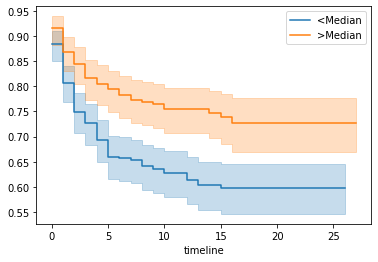

In [56]:
ax = plt.subplot(111)



kmf.fit(T_small, event_observed=E_small, label="<Median")
kmf.plot(ax=ax)

kmf.fit(T_big, event_observed=E_big, label=">Median")
kmf.plot(ax=ax)

plt.title("");

plt.savefig("dfs_tma.svg", format="svg")